<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to `pandas`

_Authors: Tim Book, Ng Shu Min_

---

`pandas` is the most popular python package for managing datasets and is used extensively by data scientists.

### Learning Objectives

- Define the anatomy of DataFrames.
- Explore data with DataFrames.


### Lesson Guide

- What is `pandas`?
- Reading data
- Exploring data
    - Filtering
    - Sorting


<a id='introduction'></a>

### What is `pandas`?

---

- Data analysis library - **Panel data system** (doesn't actually have to do with the animal, sorry).
- Created by Wes McKinney and Open Sourced by AQR Capital Management, LLC 2009.
- Implemented in highly optimized Python/Cython.
- Most ubiquitous tool used to start data analysis projects within the Python scientific ecosystem.



## Importing the Dynamic Trio
From here on out, we'll begin pretty much all of our notebooks with the following three imports.

* **pandas**: The library we'll be using to do pretty much all data manipulation.
* **numpy**: The library we'll need to do various other computations. Even if you don't think you'll need it to start, you'll probably end up using it later.
* **matplotlib**: The library we'll use most for plotting. More on this another day.


To [import a library](https://docs.python.org/3/reference/import.html), we write `import` and the library name. For Pandas, is it common to name the library `pd` so that when we reference a function from the Pandas library, we only write `pd` to reference the aliased [namespace](https://docs.python.org/3/tutorial/classes.html#python-scopes-and-namespaces) -- not `pandas`.

Similarly we will use `np` for numpy and `plt` for the `pyplot` module in `matplotlib`

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='loading_csvs'></a>

### Loading a csv into a DataFrame

---

Pandas can load many types of files, but one of the most common filetypes for storing data is in a `.csv` file. Let's load a dataset on UFO sightings from the `./datasets` directory:

In [ ]:
ufo = pd.read_csv('datasets/ufo.csv')

In [ ]:
# check the type of what we have read in
type(ufo)

This creates a pandas object called a **DataFrame**. These are powerful containers for data with many built-in functions to explore and manipulate data.

We will barely scratch the surface of DataFrame functionality in this lesson, but over the course of this class you will become an expert at using them.

<a id='exploring_data'></a>

## Exploratory Data Analysis (EDA) with Python!

---

DataFrames come with built-in functionality that makes data exploration easy. 

Let's start by looking at the "head" of your data with the `.head()` built-in function. If run alone in a notebook cell, it will show you the first and last handful of columns and the first 5 rows.

If we want to see the last part of our data, we can equivalently use the ```.tail()``` function.

We can specify the number of rows we want to see by adding an argument, for example to view 10 rows, use  ```.tail(10)```

<a id='data_dimensions'></a>

### Data dimensions

---

It's good to look at what the dimensions of your data are. The ```.shape``` property will tell you the rows and colum counts of your DataFrame.

You will notice that this is operates the same as `.shape` for numpy arrays/matricies. Pandas makes use of numpy under the hood for optimization and speed.

Look at the names of your columns with the ```.columns``` property.

## Selecting a Column

We can select columns in two ways. Either we treat the column as an attribute of the DataFrame or we index the DataFrame for a specific element (in this case, the element is a column name).

#### Column as an Attribute

You can use the bracket syntax just like python dictionaries with the string name of the column to extract that column.Treating the column as an attribute returns a Series of values. 

To refer to a specific column, you can use the column name as a string in the square brackets. 


You can use either single quotes or double quotes in Python to refer to a String.

We can also use the ```.head()``` function on a single column, which is represented as a pandas Series object.

You can also access the column of a DataFrame by using the column name as the propery, but only if it matches Python's variable name rules.


In [ ]:
# Try to refrain from doing this...
# Why shouldn't you rely on this? (There are several good reasons).


#### Indexing the Dataframe

Indexing the DataFrame means we want to access specific columns. In this case we use a *list* of the column names in the brackets to specify the columns that we want.



In [ ]:
# Select two columns in a list to index the DataFrame


<a id='dataframe_series'></a>

### DataFrame vs. Series

---

We've been playing with them, so I guess we should define them formally:

* A **`Series`** is a one-dimensional array of values **with an index**.
* A **`DataFrame`** is a two-dimensional array of values **with both a row and column index**.
* It turns out - each column of a `DataFrame` is actually a `Series`!
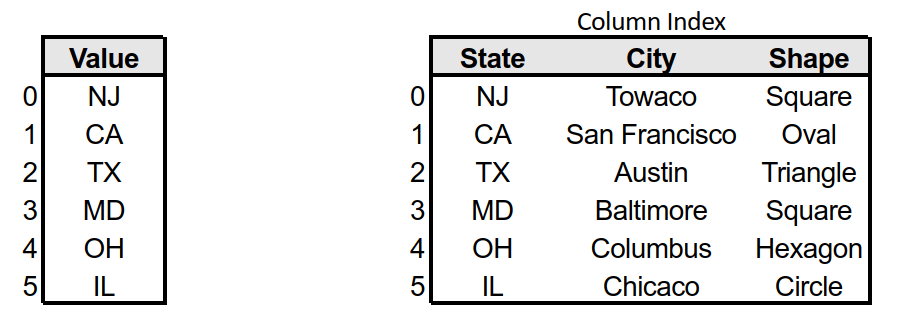


There is an important difference between using a list of strings and just a string with a column's name: when you use a list with the string it returns another **DataFrame**, but when you use just the string it returns a pandas **Series** object.

In [ ]:
print(type(ufo['City']))
print(type(ufo[['City']]))

In [ ]:
# Let's have a look at what is returned to see the difference
# ufo['City']
# ufo[['City']]

<a id='info'></a>

### Examining your data with `.info()`

---

The `.info()` should be the first thing you look at when getting acquainted with a new dataset.

**Types** are very important.  They impact the way data will be represented in our machine learning models, how data can be joined, whether or not math operators can be applied, and when you can encounter unexpected results.

> _Typical problems when working with new datasets_:
> - Missing values
> - Unexpected types (string/object instead of int/float)
> - Dirty data (commas, dollar signs, unexpected characters, etc)
> - Blank values that are actually "non-null" or single white-space characters

`.info()` is a function that is available on every **DataFrame** object. It gives you information about:

- Name of column / variable attribute
- Type of index (RangeIndex is default)
- Count of non-null values by column / attribute
- Type of data contained in column / attribute
- Unqiue counts of dtypes (Pandas data types)
- Memory usage of our dataset


The `dtypes` property also helps us examine the data types of each of the columns. These data types were automatically inferred by `pandas` when reading in the data set. 

<a id='describe'></a>

## Quick Summaries

---

The `.describe()` function is very useful for taking a quick look at your data. It gives you some of the basic descriptive statistics.




In [ ]:
# Let's read in the diamonds data set and check the first few rows
diamonds = pd.read_csv('datasets/diamonds.csv')
diamonds.head()

In [ ]:
# Let's describe the price


In [ ]:
# We can even do it to the whole DataFrame - what does that look like?
# What's missing?


You can use `.value_counts()` to get a good tabular view of a categorical variable.

In [ ]:
# Let's count up the cuts


In [ ]:
# Let's do the same thing, but normalized (out of 100%)

We can use `unique()` and `nunique()` to determine the unique values and the number of these unique values for categorical variables.

```.describe()``` gives us these statistics:

- **count**, which is equivalent to the number of cells (rows)
- **mean**, the average of the values in the column
- **std**, which is the standard deviation
- **min**, the minimum value
- **25%**, the 25th percentile of the values 
- **50%**, the 50th percentile of the values, which is the equivalent to the median
- **75%**, the 75th percentile of the values
- **max**, the maximum value

There are built-in math functions that will work on all of the columns of a DataFrame at once, or subsets of the data.

I can use the `.mean()` function on the `ufo` DataFrame to get the mean for every column.

In [ ]:
# Find the median

In [ ]:
# find specific quantiles
diamonds['price'].quantile([0.25, 0.75])

<a id='independent_practice'></a>

### Now you!

---

Now that we know a little bit about basic DataFrame use, let's practice on a new dataset.

> Pro tip:  You can use the "tab" key to browse filesystem resources when your cursor is in a string to get a relative reference to the files that can be loaded in Jupyter notebook.  Remember, you have to use your arrow keys to navigate the files populated in the UI. 

<img src="https://snag.gy/IlLNm9.jpg">

1. Read in the `cars.csv` dataset. (call it `cars`)
1. What is the mean `mpg` for cars in this dataset?

## Filtering a Dataset

Filtering and sorting are key processes that allow us to drill into the 'nitty gritty' and cross sections of our dataset.

Consider the `diamonds` dataset:


To filter, we use a process called **Boolean Filtering**, wherein we define a Boolean condition, and use that Boolean condition as a **mask** to filter on our DataFrame.

In [ ]:
# which rows have carat value > 0.50? 


Now we can use that 'mask' from above, and apply it to our full dataframe. Every time we have a `True` in a row, we return the row. If we have a `False` in that row, we do not return it. The result is a dataframe that only has rows where the mask had a value of `True`.

### Quick Exercise

Let's calculate the **mean carat weight** for diamonds with `cut` **Premium**
> Think: What are the component parts of this problem?

In [ ]:
# First find the diamonds where the cut == 'Premium'
# Then select the 'carat' column as a series
# Finally, find the mean


## Filtering on Multiple Conditions

We can also filter on _multiple conditions_. 
The format for multiple conditions is:

`df[ (df['col1'] == value1) & (df['col2'] == value2) ]`

Or, more simply:

`df[ (CONDITION 1) & (CONDITION 2) ]`

Which eventually may evaluate to something like:

`df[ True & False ]`

...on a row-by-row basis. If the end result is `False`, the row is omitted.

_Don't forget parentheses in your conditions!_ This is a common mistake.

In [ ]:
# Before, we filtered on rows where the cut was 'Premium'. We also filtered where carat weight was more than 0.50. 
# Let's see what happens when we filter on *both* simultaneously.
# Find all diamonds where the cut is Premium AND the carat weight is greater than 0.50
# "And" logic - use ampersand (&)
# Note parentheses mandatory!


In [ ]:
# What about diamonds where the cut is Premium OR the carat weight is greater than 0.50?
# "Or" logic - use pipe (|)

## Quick Exercise

Find all the ufo sightings in Hollywood, CA. 


#### Other useful functions for filtering

In [ ]:
cars[cars['mpg'].between(24, 30)]

In [ ]:
cars[~cars['mpg'].between(14, 31)]

In [ ]:
ufo[ufo['City'].isin(['Towaco', 'Montville'])]

<a id='indexing'></a>

## Pandas Indexing: `.loc` and `.iloc`

---

So far we've learned how to select both rows and columns. The savvy and skeptical student would have noticed a problem here. We have ambiguous notation! What does this do:

```python
data[something]
```

We can't tell! Is `something` a mask or a string? One selects rows, the other selects columns. 


In [ ]:
# indexing by selecting columns
diamonds[['carat','price']]

In [ ]:
# using boolean mask to select rows
diamonds[diamonds['cut']=='Premium']

**What if we wanted to filter rows and select columns at the same time?!**

Pandas has two properties that you can use for indexing:

- **`.loc`** indexes with the _labels_ for rows and columns axis.
- **`.iloc`** indexes with the _integer positions_ for rows and columns axis.
> There used to be a third, `.ix` which is now deprecated and shan't ever be used again.

## `.loc` is Most Common
The syntax of `.loc` is pretty intuitive:

```python
data.loc[rows, columns]
```

Where `rows` is often a filter (ie, a **mask**), and `columns` is a list of columns, or even just `:` to select all columns.

In [ ]:
# Choose rows with Premium cut and show only the carat and price
diamonds.loc[diamonds['cut']=='Premium', ['carat','price']]

In [ ]:
# Select all columns 
# What is this similar to?
diamonds.loc[diamonds['cut']=='Premium', :]

In [ ]:
diamonds.loc[:, ['carat', 'cut']]

### Acccctually.....

You can see that using : to select all columns or rows is similar to using the boolean mask or indexing by column.

According to **_The Zen of Python_**, explicit is better than implicit. `.loc` is explicit. **Most people choose to always use `.loc` instead of the ambiguous `data[something]` notation! This is a pretty good idea! When in doubt, use `.loc`!**

### `.iloc` is rare, but useful
The `i` stands for "integer" and will give you the actual zero-indexed numerical indices.

Remember that Python list indexing using **_start:stop:step_** will use the element with index _start_, until just before _stop_ with each _step_ between the _start_ and _stop_

In [ ]:
cars.head()

In [ ]:
# Selecting rows 0 to 2 and all alternating columns
cars.iloc[:3, ::2]

In [ ]:
# Selecting rows 0 to 2 and columns 3 to 5
cars.iloc[:3, 3:6]

## Sorting

In [ ]:
# We can sort individual Series...
cars['mpg'].sort_values().head()

In [ ]:
cars['mpg'].sort_values(ascending=False).head()

In [ ]:
# Or the entire DataFrame by the specific column
cars.sort_values('mpg').head()

In [ ]:
# Or the entire DataFrame by more than one column using lists
# cars.sort_values(by=??? , ascending=??? ).head()

## Another quick exercise

Can you find the 5 most recent ufo sightings in Roswell, New Mexico (NM)? 
First we will convert the `Time` column into a `datetime` object.

In [ ]:
ufo.Time = pd.to_datetime(ufo.Time)

In [ ]:
# check the ufo data types
ufo.dtypes

In [ ]:
# Give me the 5 most recent UFO sightings in Roswell, New Mexico (NM).
# You'll need to filter and use .sort_values()
# This is a hard one!


## Homework / Review

Consider the Superstore dataset, which consist of a two tables stored as .csv files.

- Products Table (products.csv)
- Orders Table (orders.csv)

The Products Table contains the following attributes:

- **product_id** - 	The unique identifier value for the product in the order.
- **category** - 	The product's highest level category.
- **sub_category** - 	The classification of the product within the high-level category.
- **product_name** - 	The name of the product.
- **product_cost_to_consumer** - 	The cost of each product on a single quantity basis.

Q1. Read in the products.csv file that is in the `datasets` directory into a DataFrame called `products`.



In [ ]:
#Q1 Answer here


Q2. Print the first 4 rows of the `products` DataFrame.


In [ ]:
#Q2 answer here


Q3. Identify the shape of the `products` DataFrame (how many rows and columns?)


In [ ]:
#Q3 answer here


Q4. How many products of each category are there?

In [ ]:
#Q4 Answer here


Q5. What is the mean product cost to consumer for all products?

Q6. What is the mean product cost to consumer for products in the category 'Furniture'?

Q7. What are the top 10 products with the highest product cost to consumer containing the word "Recycled" or "Green" in the product name?
Return your answer as a DataFrame object.

## Recap

We covered a lot of ground! It's ok if this takes a while to gel.

```python

# basic DataFrame operations
df.head()
df.tail()
df.shape
df.columns
df.Index
df.info()

# selecting columns
df.column_name
df['column_name']
df[['column_name1','column_name2','column_name3']]

# notable columns operations
df.describe() # five number summary
df['col1'].nunique() # number of unique values
df['col1'].value_counts() # number of occurrences of each value in column

# filtering
df[ df['col1'] < 50 ] # filter column to be less than 50
df[ (df['col1'] == value1) & (df['col2'] > value2) ] # filter column where col1 is equal to value1 AND col2 is greater to value 2

# sorting
df.sort_values(by='column_name', ascending = False) # sort biggest to smallest

```


It's common to refer back to your own code *all the time.* Don't hesistate to reference this guide! 🐼
